# ***SCRAPING DATA***

In [1]:
!pip install google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.2 MB/s eta 0:00:00


In [2]:
from google_play_scraper import reviews, Sort

app_id = 'com.roblox.client'

def get_reviews(app_id, lang='id', count=10000, sort=Sort.NEWEST, filter_score_with=None, filter_device_with=None, continuation_token=None):
    try:
        result, continuation_token = reviews(
            app_id,
            lang=lang,
            country='id',
            sort=sort,
            count=count,
            filter_score_with=filter_score_with,
            filter_device_with=filter_device_with,
            continuation_token=continuation_token
        )

        return result, continuation_token
    except Exception as e:
        print("Error:", e)
        return None, None

reviews, continuation_token = get_reviews(app_id)

if reviews is not None:
    print("Jumlah ulasan:", len(reviews))
    if len(reviews) > 0:
        print("Contoh ulasan:")
        print(reviews[0])
else:
    print("Tidak dapat mengambil ulasan.")


Jumlah ulasan: 10000
Contoh ulasan:
{'reviewId': 'aa753c29-3ebe-4b80-8742-243df0308134', 'userName': 'Pengguna Google', 'userImage': 'https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g', 'content': 'tolong perbaiki robux yang pending gw tungguin ampe 30 hari lebih tu robux ga masuk jir', 'score': 3, 'thumbsUpCount': 1, 'reviewCreatedVersion': '2.701.966', 'at': datetime.datetime(2025, 12, 12, 6, 57, 54), 'replyContent': None, 'repliedAt': None, 'appVersion': '2.701.966'}


In [3]:
import csv

def export_to_csv(reviews, file_name='hasil_scraper_ulasan_app_roblox.csv'):
    if reviews:
        fieldnames = ['Review ID', 'Username', 'Rating', 'Review Text', 'Date']

        with open(file_name, mode='w', newline='', encoding='utf-8') as csv_file:
            writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
            writer.writeheader()

            for review in reviews:
                writer.writerow({
                    'Review ID': review['reviewId'],
                    'Username': review['userName'],
                    'Rating': review['score'],
                    'Review Text': review['content'],
                    'Date': review['at']
                })

        print(f"Data berhasil diekspor ke '{file_name}'")
    else:
        print("Tidak ada data ulasan untuk diekspor.")

export_to_csv(reviews)


Data berhasil diekspor ke 'hasil_scraper_ulasan_app_roblox.csv'


In [4]:
import pandas as pd

data = pd.read_csv("hasil_scraper_ulasan_app_roblox.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review ID    10000 non-null  object
 1   Username     10000 non-null  object
 2   Rating       10000 non-null  int64 
 3   Review Text  10000 non-null  object
 4   Date         10000 non-null  object
dtypes: int64(1), object(4)
memory usage: 390.8+ KB


In [5]:
data.head(4)

,Review ID,Username,Rating,Review Text,Date
0,aa753c29-3ebe-4b80-8742-243df0308134,Pengguna Google,3,tolong perbaiki robux yang pending gw tungguin...,2025-12-12 06:57:54
1,ea81b70a-838c-493b-9598-4cf68eec5f9b,Pengguna Google,1,"Fish it paham kn knp, game haram😒",2025-12-12 06:29:11
2,89d9b430-dba4-443f-9d62-6ae19a32ea46,Pengguna Google,1,GG seru banget wok,2025-12-12 04:51:25
3,9df25604-5560-4a1c-ad79-440f9702b5f4,Pengguna Google,1,"Roblox blunder, gara gara ngedeteksi aplikasi ...",2025-12-12 03:47:03


# ***PREPROCESSING DATA***

In [6]:
import pandas as pd

data = pd.read_csv("hasil_scraper_ulasan_app_roblox.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review ID    10000 non-null  object
 1   Username     10000 non-null  object
 2   Rating       10000 non-null  int64 
 3   Review Text  10000 non-null  object
 4   Date         10000 non-null  object
dtypes: int64(1), object(4)
memory usage: 390.8+ KB


In [7]:
data.head(5)

,Review ID,Username,Rating,Review Text,Date
0,aa753c29-3ebe-4b80-8742-243df0308134,Pengguna Google,3,tolong perbaiki robux yang pending gw tungguin...,2025-12-12 06:57:54
1,ea81b70a-838c-493b-9598-4cf68eec5f9b,Pengguna Google,1,"Fish it paham kn knp, game haram😒",2025-12-12 06:29:11
2,89d9b430-dba4-443f-9d62-6ae19a32ea46,Pengguna Google,1,GG seru banget wok,2025-12-12 04:51:25
3,9df25604-5560-4a1c-ad79-440f9702b5f4,Pengguna Google,1,"Roblox blunder, gara gara ngedeteksi aplikasi ...",2025-12-12 03:47:03
4,339b7c57-6052-4e86-8649-68d7b1a50ec0,Pengguna Google,1,game burik burik semua map kebanyakan bug buri...,2025-12-12 02:15:38


In [8]:
df  = pd.DataFrame(data[['Review Text']])
df.head(5)

,Review Text
0,tolong perbaiki robux yang pending gw tungguin...
1,"Fish it paham kn knp, game haram😒"
2,GG seru banget wok
3,"Roblox blunder, gara gara ngedeteksi aplikasi ..."
4,game burik burik semua map kebanyakan bug buri...


**PROSES HAPUS DATA DUPLIKAT**

---



In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review Text  10000 non-null  object
dtypes: object(1)
memory usage: 78.3+ KB


In [10]:
df.drop_duplicates(subset ="Review Text", keep = 'first', inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8467 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review Text  8467 non-null   object
dtypes: object(1)
memory usage: 132.3+ KB


**PROSES CLEANING**

---



In [12]:
import re
import string
import nltk

# Fungsi untuk menghapus URL
def remove_URL(tweet):
    if tweet is not None and isinstance(tweet, str):
        url = re.compile(r'https?://\S+|www\.\S+')
        return url.sub(r'', tweet)
    else:
        return tweet

# Fungsi untuk menghapus HTML
def remove_html(tweet):
    if tweet is not None and isinstance(tweet, str):
        html = re.compile(r'<.*?>')
        return html.sub(r'', tweet)
    else:
        return tweet

# Fungsi untuk menghapus emoji
def remove_emoji(tweet):
    if tweet is not None and isinstance(tweet, str):
        emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F700-\U0001F77F"  # alchemical symbols
            u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
            u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
            u"\U0001FA00-\U0001FA6F"  # Chess Symbols
            u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
            u"\U0001F004-\U0001F0CF"  # Additional emoticons
            u"\U0001F1E0-\U0001F1FF"  # flags
                               "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', tweet)
    else:
        return tweet

# Fungsi untuk menghapus simbol
def remove_symbols(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)
        return tweet
    else:
        return tweet


# Fungsi untuk menghapus angka
def remove_numbers(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'\d', '', tweet)
        return tweet
    else:
        return tweet

# Fungsi hapus username
def remove_usernames(text):
    if text is not None and isinstance(text, str):
        return re.sub(r'@\w+', '', text)
    else:
        return text

df['cleaning'] = df['Review Text'].apply(lambda x: remove_URL(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_usernames(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_html(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_emoji(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_symbols(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_numbers(x))

df.head(5)

,Review Text,cleaning
0,tolong perbaiki robux yang pending gw tungguin...,tolong perbaiki robux yang pending gw tungguin...
1,"Fish it paham kn knp, game haram😒",Fish it paham kn knp game haram
2,GG seru banget wok,GG seru banget wok
3,"Roblox blunder, gara gara ngedeteksi aplikasi ...",Roblox blunder gara gara ngedeteksi aplikasi p...
4,game burik burik semua map kebanyakan bug buri...,game burik burik semua map kebanyakan bug buri...


**PROSES CASE FOLDING**

---



In [13]:
def case_folding(text):
    if isinstance(text, str):
        lowercase_text = text.lower()
        return lowercase_text
    else:
        return text

df['case_folding'] = df['cleaning'].apply(case_folding)
df.head(5)

,Review Text,cleaning,case_folding
0,tolong perbaiki robux yang pending gw tungguin...,tolong perbaiki robux yang pending gw tungguin...,tolong perbaiki robux yang pending gw tungguin...
1,"Fish it paham kn knp, game haram😒",Fish it paham kn knp game haram,fish it paham kn knp game haram
2,GG seru banget wok,GG seru banget wok,gg seru banget wok
3,"Roblox blunder, gara gara ngedeteksi aplikasi ...",Roblox blunder gara gara ngedeteksi aplikasi p...,roblox blunder gara gara ngedeteksi aplikasi p...
4,game burik burik semua map kebanyakan bug buri...,game burik burik semua map kebanyakan bug buri...,game burik burik semua map kebanyakan bug buri...


**Normalisasi Kata**

---



In [14]:
import pandas as pd
import requests
from io import BytesIO

# Fungsi penggantian kata tidak baku
def replace_taboo_words(text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku[word]
                if isinstance(baku_word, str) and all(char.isalpha() for char in baku_word):
                    replaced_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(word)
                    kata_tidak_baku_hash.append(hash(word))
            else:
                replaced_words.append(word)
        replaced_text = ' '.join(replaced_words)
    else:
        replaced_text = ''
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

    return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash

# Baca dataset kamu (pastikan df sudah tersedia)
data = pd.DataFrame(df[['Review Text','cleaning','case_folding']])
data.head()

,Review Text,cleaning,case_folding
0,tolong perbaiki robux yang pending gw tungguin...,tolong perbaiki robux yang pending gw tungguin...,tolong perbaiki robux yang pending gw tungguin...
1,"Fish it paham kn knp, game haram😒",Fish it paham kn knp game haram,fish it paham kn knp game haram
2,GG seru banget wok,GG seru banget wok,gg seru banget wok
3,"Roblox blunder, gara gara ngedeteksi aplikasi ...",Roblox blunder gara gara ngedeteksi aplikasi p...,roblox blunder gara gara ngedeteksi aplikasi p...
4,game burik burik semua map kebanyakan bug buri...,game burik burik semua map kebanyakan bug buri...,game burik burik semua map kebanyakan bug buri...


In [15]:
# Unduh dan baca kamus dari GitHub
url = "https://github.com/analysisdatasentiment/kamus_kata_baku/raw/main/kamuskatabaku.xlsx"
response = requests.get(url)
file_excel = BytesIO(response.content)
kamus_data = pd.read_excel(file_excel)

# Buat dictionary dari kamus
kamus_tidak_baku_dict = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))

In [16]:
# Terapkan fungsi normalisasi
data[['normalisasi', 'Kata_Baku', 'Kata_Tidak_Baku', 'Kata_Tidak_Baku_Hash']] = data['case_folding'].apply(
    lambda x: pd.Series(replace_taboo_words(x, kamus_tidak_baku_dict))
)

# Ambil kolom yang relevan
df = pd.DataFrame(data[['Review Text','cleaning','case_folding','normalisasi']])
df.head(5)

,Review Text,cleaning,case_folding,normalisasi
0,tolong perbaiki robux yang pending gw tungguin...,tolong perbaiki robux yang pending gw tungguin...,tolong perbaiki robux yang pending gw tungguin...,tolong perbaiki robux yang pending gue tunggui...
1,"Fish it paham kn knp, game haram😒",Fish it paham kn knp game haram,fish it paham kn knp game haram,fish itu paham kan kenapa game haram
2,GG seru banget wok,GG seru banget wok,gg seru banget wok,tidak seru banget wok
3,"Roblox blunder, gara gara ngedeteksi aplikasi ...",Roblox blunder gara gara ngedeteksi aplikasi p...,roblox blunder gara gara ngedeteksi aplikasi p...,roblox blunder gara gara ngedeteksi aplikasi p...
4,game burik burik semua map kebanyakan bug buri...,game burik burik semua map kebanyakan bug buri...,game burik burik semua map kebanyakan bug buri...,game burik burik semua map kebanyakan bug buri...


**TOKENIZATION**

---



In [17]:
def tokenize(text):
    tokens = text.split()
    return tokens

df['tokenize'] = df['normalisasi'].apply(tokenize)

df.head(5)

,Review Text,cleaning,case_folding,normalisasi,tokenize
0,tolong perbaiki robux yang pending gw tungguin...,tolong perbaiki robux yang pending gw tungguin...,tolong perbaiki robux yang pending gw tungguin...,tolong perbaiki robux yang pending gue tunggui...,"[tolong, perbaiki, robux, yang, pending, gue, ..."
1,"Fish it paham kn knp, game haram😒",Fish it paham kn knp game haram,fish it paham kn knp game haram,fish itu paham kan kenapa game haram,"[fish, itu, paham, kan, kenapa, game, haram]"
2,GG seru banget wok,GG seru banget wok,gg seru banget wok,tidak seru banget wok,"[tidak, seru, banget, wok]"
3,"Roblox blunder, gara gara ngedeteksi aplikasi ...",Roblox blunder gara gara ngedeteksi aplikasi p...,roblox blunder gara gara ngedeteksi aplikasi p...,roblox blunder gara gara ngedeteksi aplikasi p...,"[roblox, blunder, gara, gara, ngedeteksi, apli..."
4,game burik burik semua map kebanyakan bug buri...,game burik burik semua map kebanyakan bug buri...,game burik burik semua map kebanyakan bug buri...,game burik burik semua map kebanyakan bug buri...,"[game, burik, burik, semua, map, kebanyakan, b..."


**PROSES STOPWORD REMOVAL**

---



In [18]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [19]:
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

df['stopword removal'] = df['tokenize'].apply(lambda x: remove_stopwords(x))

df.head(5)

,Review Text,cleaning,case_folding,normalisasi,tokenize,stopword removal
0,tolong perbaiki robux yang pending gw tungguin...,tolong perbaiki robux yang pending gw tungguin...,tolong perbaiki robux yang pending gw tungguin...,tolong perbaiki robux yang pending gue tunggui...,"[tolong, perbaiki, robux, yang, pending, gue, ...","[tolong, perbaiki, robux, pending, gue, tunggu..."
1,"Fish it paham kn knp, game haram😒",Fish it paham kn knp game haram,fish it paham kn knp game haram,fish itu paham kan kenapa game haram,"[fish, itu, paham, kan, kenapa, game, haram]","[fish, paham, game, haram]"
2,GG seru banget wok,GG seru banget wok,gg seru banget wok,tidak seru banget wok,"[tidak, seru, banget, wok]","[seru, banget, wok]"
3,"Roblox blunder, gara gara ngedeteksi aplikasi ...",Roblox blunder gara gara ngedeteksi aplikasi p...,roblox blunder gara gara ngedeteksi aplikasi p...,roblox blunder gara gara ngedeteksi aplikasi p...,"[roblox, blunder, gara, gara, ngedeteksi, apli...","[roblox, blunder, gara, gara, ngedeteksi, apli..."
4,game burik burik semua map kebanyakan bug buri...,game burik burik semua map kebanyakan bug buri...,game burik burik semua map kebanyakan bug buri...,game burik burik semua map kebanyakan bug buri...,"[game, burik, burik, semua, map, kebanyakan, b...","[game, burik, burik, map, kebanyakan, bug, bur..."


**PROSES STEAMING DATA**

---



In [20]:
!pip install Sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.5 MB/s eta 0:00:00


In [21]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    return [stemmer.stem(word) for word in text]

df['steming_data'] = df['stopword removal'].apply(lambda x: ' '.join(stem_text(x)))
df.head(5)

,Review Text,cleaning,case_folding,normalisasi,tokenize,stopword removal,steming_data
0,tolong perbaiki robux yang pending gw tungguin...,tolong perbaiki robux yang pending gw tungguin...,tolong perbaiki robux yang pending gw tungguin...,tolong perbaiki robux yang pending gue tunggui...,"[tolong, perbaiki, robux, yang, pending, gue, ...","[tolong, perbaiki, robux, pending, gue, tunggu...",tolong baik robux pending gue tungguin robux m...
1,"Fish it paham kn knp, game haram😒",Fish it paham kn knp game haram,fish it paham kn knp game haram,fish itu paham kan kenapa game haram,"[fish, itu, paham, kan, kenapa, game, haram]","[fish, paham, game, haram]",fish paham game haram
2,GG seru banget wok,GG seru banget wok,gg seru banget wok,tidak seru banget wok,"[tidak, seru, banget, wok]","[seru, banget, wok]",seru banget wok
3,"Roblox blunder, gara gara ngedeteksi aplikasi ...",Roblox blunder gara gara ngedeteksi aplikasi p...,roblox blunder gara gara ngedeteksi aplikasi p...,roblox blunder gara gara ngedeteksi aplikasi p...,"[roblox, blunder, gara, gara, ngedeteksi, apli...","[roblox, blunder, gara, gara, ngedeteksi, apli...",roblox blunder gara gara ngedeteksi aplikasi t...
4,game burik burik semua map kebanyakan bug buri...,game burik burik semua map kebanyakan bug buri...,game burik burik semua map kebanyakan bug buri...,game burik burik semua map kebanyakan bug buri...,"[game, burik, burik, semua, map, kebanyakan, b...","[game, burik, burik, map, kebanyakan, bug, bur...",game burik burik map banyak bug burik burik


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8467 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Review Text       8467 non-null   object
 1   cleaning          8467 non-null   object
 2   case_folding      8467 non-null   object
 3   normalisasi       8467 non-null   object
 4   tokenize          8467 non-null   object
 5   stopword removal  8467 non-null   object
 6   steming_data      8467 non-null   object
dtypes: object(7)
memory usage: 529.2+ KB


**PROSES HAPUS DATA BERNILAI KOSONG (NAN)**

---



In [23]:
data = df.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8467 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Review Text       8467 non-null   object
 1   cleaning          8467 non-null   object
 2   case_folding      8467 non-null   object
 3   normalisasi       8467 non-null   object
 4   tokenize          8467 non-null   object
 5   stopword removal  8467 non-null   object
 6   steming_data      8467 non-null   object
dtypes: object(7)
memory usage: 529.2+ KB


**WORDCLOUD SETELAH PREPROCESSING**

---



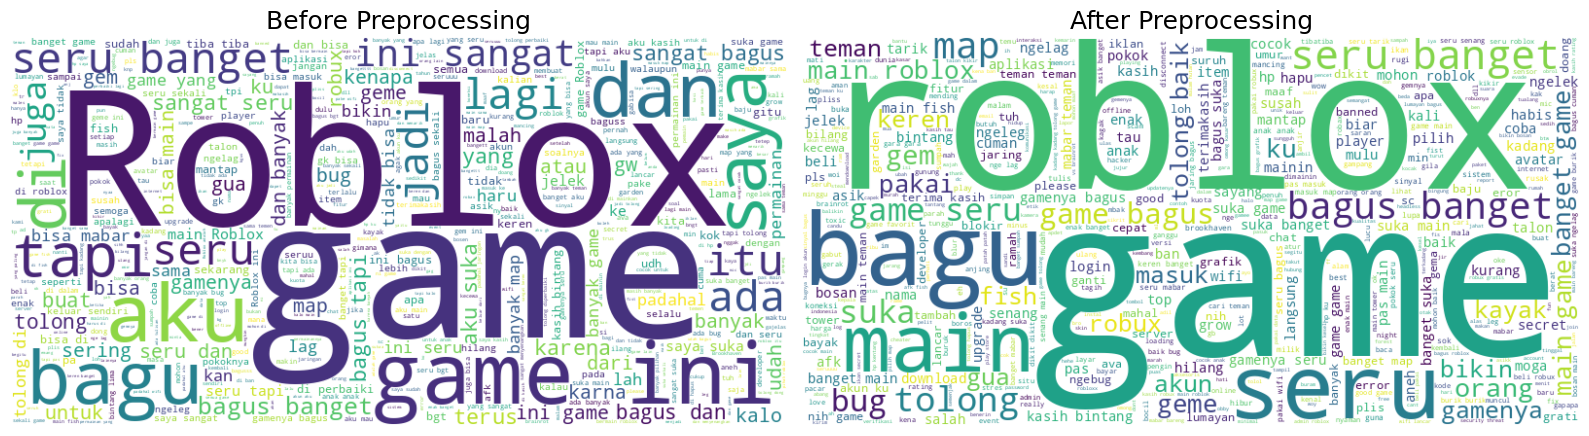

In [24]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Buat stopwords tambahan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp', 'lu', 'deh', 'fyp', 'ya', 'gue',
                  'sih', 'yg', 'nya', 'aja', 'sdh', 'gak', 'ga','update','apk','ajar'])

# WordCloud Before (dari kolom 'Review Text')
text_before = ' '.join(data['Review Text'].astype(str).tolist())
wc_before = WordCloud(stopwords=stopwords, background_color="white", max_words=500, width=800, height=400).generate(text_before)

# WordCloud After (dari kolom 'steming_data')
text_after = ' '.join(data['steming_data'].astype(str).tolist())
wc_after = WordCloud(stopwords=stopwords, background_color="white", max_words=500, width=800, height=400).generate(text_after)

# Visualisasi side-by-side
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(wc_before, interpolation='bilinear')
plt.axis("off")
plt.title("Before Preprocessing", fontsize=18)

plt.subplot(1, 2, 2)
plt.imshow(wc_after, interpolation='bilinear')
plt.axis("off")
plt.title("After Preprocessing", fontsize=18)

plt.tight_layout()
plt.show()


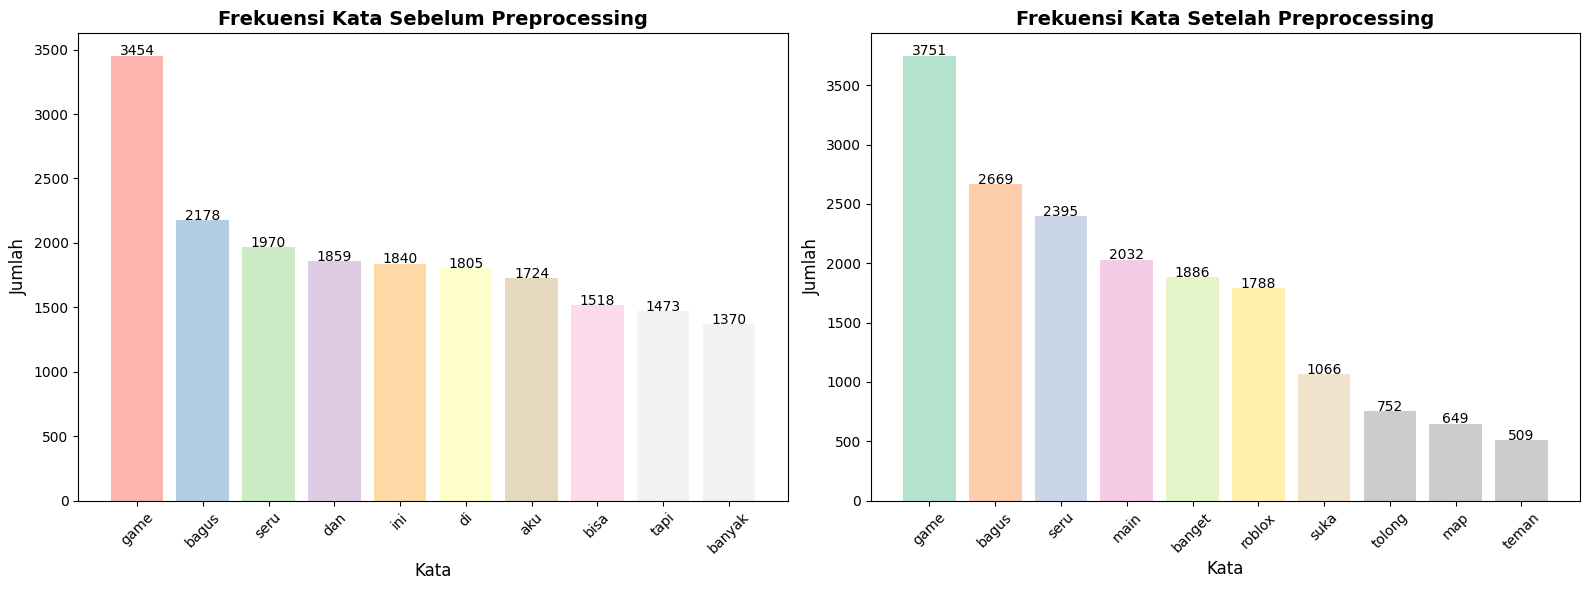

In [25]:
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import STOPWORDS

# Set stopwords tambahan
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp', 'lu', 'deh', 'fyp', 'ya', 'gue',
                  'sih', 'yg', 'nya', 'aja', 'sdh', 'gak', 'ga','update','apk','ajar'])

# BEFORE: kolom 'Review Text'
all_text_before = ' '.join(data["Review Text"].astype(str))
words_before = all_text_before.split()
filtered_words_before = [word for word in words_before if word.lower() not in stopwords]
word_counts_before = Counter(filtered_words_before)
top_words_before = word_counts_before.most_common(10)
word_before, count_before = zip(*top_words_before)

# AFTER: kolom 'steming_data'
all_text_after = ' '.join(data["steming_data"].astype(str))
words_after = all_text_after.split()
filtered_words_after = [word for word in words_after if word.lower() not in stopwords]
word_counts_after = Counter(filtered_words_after)
top_words_after = word_counts_after.most_common(10)
word_after, count_after = zip(*top_words_after)

# Plot berdampingan
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# BEFORE Plot
colors_before = plt.cm.Pastel1(range(len(word_before)))
bars1 = axes[0].bar(word_before, count_before, color=colors_before)
axes[0].set_title("Frekuensi Kata Sebelum Preprocessing", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Kata", fontsize=12)
axes[0].set_ylabel("Jumlah", fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
for bar, count in zip(bars1, count_before):
    axes[0].text(bar.get_x() + bar.get_width()/2, count + 1, str(count), ha='center')

# AFTER Plot
colors_after = plt.cm.Pastel2(range(len(word_after)))
bars2 = axes[1].bar(word_after, count_after, color=colors_after)
axes[1].set_title("Frekuensi Kata Setelah Preprocessing", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Kata", fontsize=12)
axes[1].set_ylabel("Jumlah", fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
for bar, count in zip(bars2, count_after):
    axes[1].text(bar.get_x() + bar.get_width()/2, count + 1, str(count), ha='center')

plt.tight_layout()
plt.show()


In [26]:
df.to_csv('Hasil_Preprocessing_Data.csv',encoding='utf8', index=False);

# ***PELEBALAN DATA METODE LAXICON BASED***

In [27]:
import pandas as pd

data = pd.read_csv("Hasil_Preprocessing_Data.csv")
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8467 entries, 0 to 8466
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Review Text       8467 non-null   object
 1   cleaning          8425 non-null   object
 2   case_folding      8425 non-null   object
 3   normalisasi       8397 non-null   object
 4   tokenize          8467 non-null   object
 5   stopword removal  8467 non-null   object
 6   steming_data      8370 non-null   object
dtypes: object(7)
memory usage: 463.2+ KB


,Review Text,cleaning,case_folding,normalisasi,tokenize,stopword removal,steming_data
0,tolong perbaiki robux yang pending gw tungguin...,tolong perbaiki robux yang pending gw tungguin...,tolong perbaiki robux yang pending gw tungguin...,tolong perbaiki robux yang pending gue tunggui...,"['tolong', 'perbaiki', 'robux', 'yang', 'pendi...","['tolong', 'perbaiki', 'robux', 'pending', 'gu...",tolong baik robux pending gue tungguin robux m...
1,"Fish it paham kn knp, game haram😒",Fish it paham kn knp game haram,fish it paham kn knp game haram,fish itu paham kan kenapa game haram,"['fish', 'itu', 'paham', 'kan', 'kenapa', 'gam...","['fish', 'paham', 'game', 'haram']",fish paham game haram
2,GG seru banget wok,GG seru banget wok,gg seru banget wok,tidak seru banget wok,"['tidak', 'seru', 'banget', 'wok']","['seru', 'banget', 'wok']",seru banget wok
3,"Roblox blunder, gara gara ngedeteksi aplikasi ...",Roblox blunder gara gara ngedeteksi aplikasi p...,roblox blunder gara gara ngedeteksi aplikasi p...,roblox blunder gara gara ngedeteksi aplikasi p...,"['roblox', 'blunder', 'gara', 'gara', 'ngedete...","['roblox', 'blunder', 'gara', 'gara', 'ngedete...",roblox blunder gara gara ngedeteksi aplikasi t...
4,game burik burik semua map kebanyakan bug buri...,game burik burik semua map kebanyakan bug buri...,game burik burik semua map kebanyakan bug buri...,game burik burik semua map kebanyakan bug buri...,"['game', 'burik', 'burik', 'semua', 'map', 'ke...","['game', 'burik', 'burik', 'map', 'kebanyakan'...",game burik burik map banyak bug burik burik


In [28]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8370 entries, 0 to 8466
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Review Text       8370 non-null   object
 1   cleaning          8370 non-null   object
 2   case_folding      8370 non-null   object
 3   normalisasi       8370 non-null   object
 4   tokenize          8370 non-null   object
 5   stopword removal  8370 non-null   object
 6   steming_data      8370 non-null   object
dtypes: object(7)
memory usage: 523.1+ KB


In [29]:
data = pd.DataFrame(data[['steming_data']])
data.head(5)

,steming_data
0,tolong baik robux pending gue tungguin robux m...
1,fish paham game haram
2,seru banget wok
3,roblox blunder gara gara ngedeteksi aplikasi t...
4,game burik burik map banyak bug burik burik


In [30]:
import pandas as pd
import requests

# Unduh kamus leksikon positif dan negatif dari GitHub
positive_url = "https://raw.githubusercontent.com/fajri91/InSet/master/positive.tsv"
negative_url = "https://raw.githubusercontent.com/fajri91/InSet/master/negative.tsv"

positive_lexicon = set(pd.read_csv(positive_url, sep="\t", header=None)[0])
negative_lexicon = set(pd.read_csv(negative_url, sep="\t", header=None)[0])

def determine_sentiment(text):
    if isinstance(text, str):
        positive_count = sum(1 for word in text.split() if word in positive_lexicon)
        negative_count = sum(1 for word in text.split() if word in negative_lexicon)
        sentiment_score = positive_count - negative_count
        sentiment = "Negatif" if sentiment_score <= 0 else "Positif"
        return sentiment_score, sentiment
    return 0, "Negatif"

data[['Score', 'Sentiment']] = data['steming_data'].apply(lambda x: pd.Series(determine_sentiment(x)))
data.head(5)


,steming_data,Score,Sentiment
0,tolong baik robux pending gue tungguin robux m...,-3,Negatif
1,fish paham game haram,1,Positif
2,seru banget wok,1,Positif
3,roblox blunder gara gara ngedeteksi aplikasi t...,-2,Negatif
4,game burik burik map banyak bug burik burik,1,Positif


/tmp/ipython-input-1910355637.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


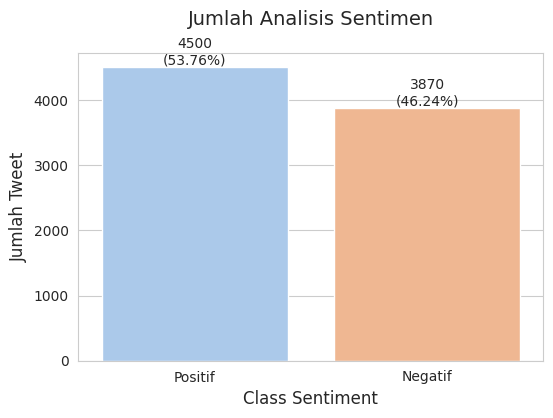

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_count = data['Sentiment'].value_counts()
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('Jumlah Analisis Sentimen', fontsize=14, pad=20)
plt.xlabel('Class Sentiment', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)

total = len(data['Sentiment'])

for i, count in enumerate(sentiment_count.values):
    percentage = f'{100 * count / total:.2f}%'
    ax.text(i, count + 0.10, f'{count}\n({percentage})', ha='center', va='bottom')

plt.show()

In [32]:
data.to_csv('Hasil_Labelling_Data.csv',encoding='utf8', index=False)

# ***NAIVE BAYES CLASDIFIKASI (NBC)***


In [33]:
import pandas as pd

data = pd.read_csv("Hasil_Labelling_Data.csv")
data.head()

,steming_data,Score,Sentiment
0,tolong baik robux pending gue tungguin robux m...,-3,Negatif
1,fish paham game haram,1,Positif
2,seru banget wok,1,Positif
3,roblox blunder gara gara ngedeteksi aplikasi t...,-2,Negatif
4,game burik burik map banyak bug burik burik,1,Positif


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8370 entries, 0 to 8369
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   steming_data  8370 non-null   object
 1   Score         8370 non-null   int64 
 2   Sentiment     8370 non-null   object
dtypes: int64(1), object(2)
memory usage: 196.3+ KB


In [35]:
data.head()

,steming_data,Score,Sentiment
0,tolong baik robux pending gue tungguin robux m...,-3,Negatif
1,fish paham game haram,1,Positif
2,seru banget wok,1,Positif
3,roblox blunder gara gara ngedeteksi aplikasi t...,-2,Negatif
4,game burik burik map banyak bug burik burik,1,Positif


**Transformasi Teks Menjadi Matriks Frekuensi Token**
**Menghitung Probabilitas Prior (𝑃(𝐶)P(C))**

---



In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Inisialisasi CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['steming_data'])
features = vectorizer.get_feature_names_out()
df_tokens = pd.DataFrame(X.toarray(), columns=features)
df_combined = pd.concat([df_tokens, data['Sentiment']], axis=1)

# Menghitung frekuensi token untuk setiap sentimen
frequency_positive = df_combined[df_combined['Sentiment'] == 'Positif'].drop('Sentiment', axis=1).sum()
frequency_negative = df_combined[df_combined['Sentiment'] == 'Negatif'].drop('Sentiment', axis=1).sum()

# Menghitung probabilitas prior
sentiment_counts = data['Sentiment'].value_counts()
total_samples = len(data)
prior_probabilities = sentiment_counts / total_samples

print("Prior Probabilities:")
print(prior_probabilities)

Prior Probabilities:
Sentiment
Positif    0.537634
Negatif    0.462366
Name: count, dtype: float64


**Menghitung Probabilitas Kondisional (𝑃(𝑤𝑖∣𝐶)P(w i∣C))**

---



In [37]:
# Menghitung probabilitas kondisional dengan smoothing Laplace
total_positive = frequency_positive.sum()
total_negative = frequency_negative.sum()
probability_conditional_positive = (frequency_positive + 1) / (total_positive + len(features))
probability_conditional_negative = (frequency_negative + 1) / (total_negative + len(features))
print("Probability Conditional Positive:")
print(probability_conditional_positive)
print("\nProbability Conditional Negative:")
print(probability_conditional_negative)

Probability Conditional Positive:
aa               0.000047
aaa              0.000023
aanu             0.000047
aaya             0.000093
abang            0.000210
                   ...   
ziolesganteng    0.000023
zombie           0.000047
zoo              0.000047
zoom             0.000070
zykaq            0.000023
Length: 6758, dtype: float64

Probability Conditional Negative:
aa               0.000033
aaa              0.000098
aanu             0.000033
aaya             0.000033
abang            0.000294
                   ...   
ziolesganteng    0.000065
zombie           0.000033
zoo              0.000033
zoom             0.000098
zykaq            0.000065
Length: 6758, dtype: float64


**Menghitung Probabilitas Posterior (𝑃(𝐶∣w)P(C∣w)) untuk Setiap Dokumen**

---



In [38]:
# Menghitung probabilitas posterior untuk setiap dokumen
def calculate_posterior_probabilities(document):
    words = document.split()
    posterior_positive = prior_probabilities['Positif']
    posterior_negative = prior_probabilities['Negatif']
    for word in words:
        if word in features:
            posterior_positive *= probability_conditional_positive[word]
            posterior_negative *= probability_conditional_negative[word]
    return {'Positif': posterior_positive, 'Negatif': posterior_negative}

data['posterior_probabilities'] = data['steming_data'].apply(calculate_posterior_probabilities)
data.head()

,steming_data,Score,Sentiment,posterior_probabilities
0,tolong baik robux pending gue tungguin robux m...,-3,Negatif,"{'Positif': 9.788771102774155e-28, 'Negatif': ..."
1,fish paham game haram,1,Positif,"{'Positif': 1.3075882017139322e-12, 'Negatif':..."
2,seru banget wok,1,Positif,"{'Positif': 7.691929767628014e-08, 'Negatif': ..."
3,roblox blunder gara gara ngedeteksi aplikasi t...,-2,Negatif,"{'Positif': 1.1556969729441408e-49, 'Negatif':..."
4,game burik burik map banyak bug burik burik,1,Positif,"{'Positif': 4.0727109794725764e-22, 'Negatif':..."


# ***Naive Bayes Multinomial***

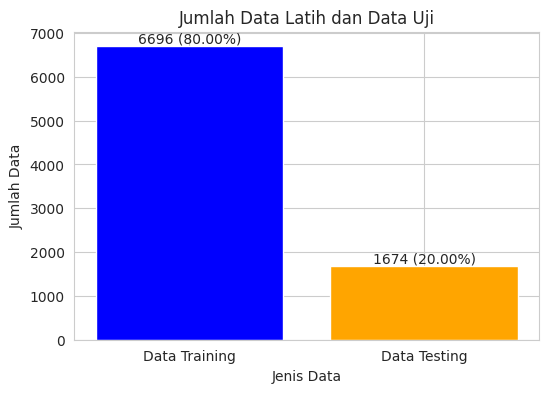

MultinomialNB Results
Confusion Matrix (MultinomialNB):
[[393 393]
 [ 62 826]]

Classification Report (MultinomialNB):
              precision    recall  f1-score   support

     Negatif       0.86      0.50      0.63       786
     Positif       0.68      0.93      0.78       888

    accuracy                           0.73      1674
   macro avg       0.77      0.72      0.71      1674
weighted avg       0.76      0.73      0.71      1674

Accuracy (MultinomialNB): 0.7282


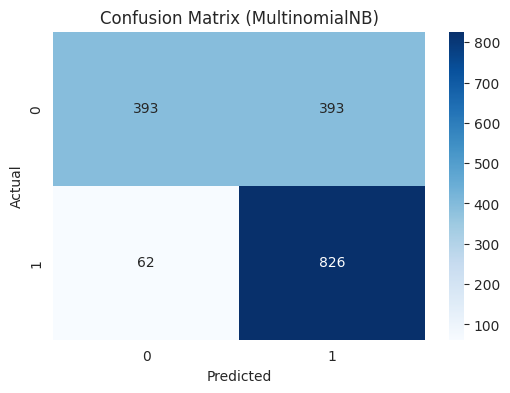

Actual vs Predicted (MultinomialNB):


,steming_data,Actual,Predicted
5848,game bagus ku,Positif,Positif
6839,game bagusstapi tolong henti bug lagg kadang s...,Positif,Positif
5060,game ya seru map mainin ngelek dikit,Negatif,Positif
1345,kasih bintang gem ya seru main,Positif,Positif
6816,suka game henti main game,Positif,Positif


In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing data
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(data['steming_data']).toarray()
y = data['Sentiment']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
import matplotlib.pyplot as plt


train_size = len(X_train)
test_size = len(X_test)

plt.figure(figsize=(6, 4))
bars = plt.bar(['Data Training', 'Data Testing'], [train_size, test_size], color=['blue', 'orange'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height} ({height / (train_size + test_size) * 100:.2f}%)',
             ha='center', va='bottom')

plt.title('Jumlah Data Latih dan Data Uji')
plt.xlabel('Jenis Data')
plt.ylabel('Jumlah Data')
plt.show()

# Initialize and train model MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Predict with MultinomialNB
y_pred_mnb = mnb.predict(X_test)

# Evaluate MultinomialNB
conf_matrix_mnb = confusion_matrix(y_test, y_pred_mnb)
class_report_mnb = classification_report(y_test, y_pred_mnb)
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)

print("MultinomialNB Results")
print("======================")
print("Confusion Matrix (MultinomialNB):")
print(conf_matrix_mnb)
print("===================================")
print("\nClassification Report (MultinomialNB):")
print(class_report_mnb)
print("===================================")
print(f"Accuracy (MultinomialNB): {accuracy_mnb:.4f}")
print("===================================")

# Plot confusion matrix for MultinomialNB
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_mnb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (MultinomialNB)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Create DataFrame for actual vs predicted (MultinomialNB)
results_mnb = pd.DataFrame({'steming_data': data.loc[y_test.index, 'steming_data'], 'Actual': y_test, 'Predicted': y_pred_mnb})
results_mnb.to_csv('Hasil_pred_MultinomialNB.csv',encoding='utf8', index=False)
print("Actual vs Predicted (MultinomialNB):")
results_mnb.head()

# ***NAIVE BAYES + SMOTE***

Distribusi sebelum SMOTE:
Counter({'Positif': 3612, 'Negatif': 3084})


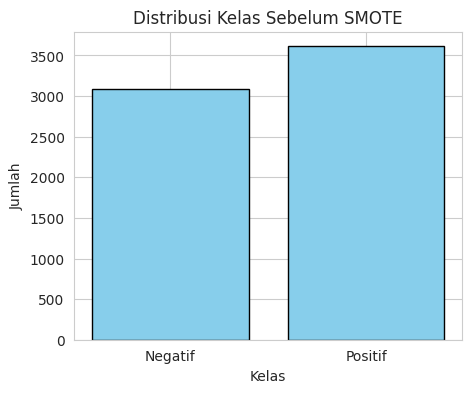

Distribusi setelah SMOTE:
Counter({'Negatif': 3612, 'Positif': 3612})


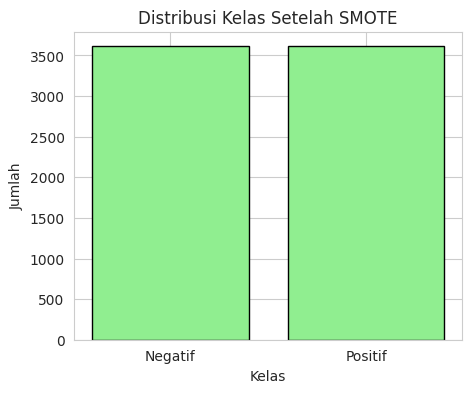

In [40]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt

# Lihat distribusi kelas SEBELUM SMOTE
print("Distribusi sebelum SMOTE:")
print(Counter(y_train))

plt.figure(figsize=(5,4))
plt.bar(Counter(y_train).keys(), Counter(y_train).values(), color='skyblue', edgecolor='black')
plt.title("Distribusi Kelas Sebelum SMOTE")
plt.xlabel("Kelas")
plt.ylabel("Jumlah")
plt.show()

# SMOTE pada data training
smote = SMOTE(random_state=42, k_neighbors=5)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Lihat distribusi kelas SETELAH SMOTE
print("Distribusi setelah SMOTE:")
print(Counter(y_train_sm))

plt.figure(figsize=(5,4))
plt.bar(Counter(y_train_sm).keys(), Counter(y_train_sm).values(), color='lightgreen', edgecolor='black')
plt.title("Distribusi Kelas Setelah SMOTE")
plt.xlabel("Kelas")
plt.ylabel("Jumlah")
plt.show()


MultinomialNB + SMOTE Results
Confusion Matrix (MultinomialNB + SMOTE):
[[537 237]
 [112 788]]

Classification Report (MultinomialNB + SMOTE):
              precision    recall  f1-score   support

     Negatif       0.83      0.69      0.75       774
     Positif       0.77      0.88      0.82       900

    accuracy                           0.79      1674
   macro avg       0.80      0.78      0.79      1674
weighted avg       0.80      0.79      0.79      1674

Accuracy (MultinomialNB + SMOTE): 0.7915


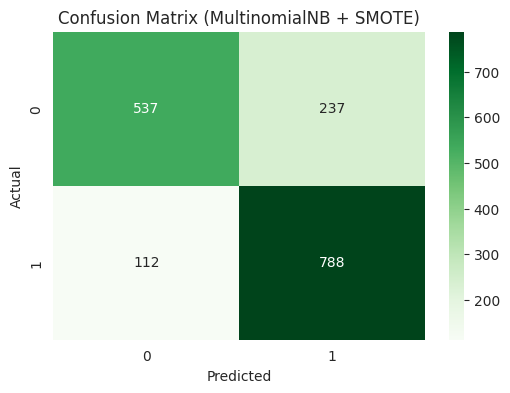

Actual vs Predicted (MultinomialNB + SMOTE):


,steming_data,Actual,Predicted
6828,lumayan ngelek kompalain ngelek banget game pa...,Positif,Positif
3815,bagus banget aneh aneh yutuber ya,Positif,Positif
7493,the best game ever,Positif,Positif
3659,bug guna tabletandroid gerak karater kadang ge...,Positif,Negatif
1191,seru banget disinisoalnya map ya suka brookhav...,Positif,Positif


In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing data
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(data['steming_data']).toarray()
y = data['Sentiment']

# Split data (PENTING: SMOTE HANYA untuk TRAINING)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Terapkan SMOTE pada data training
smote = SMOTE(random_state=42, k_neighbors=5)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Initialize and train model MultinomialNB
mnb_sm = MultinomialNB()
mnb_sm.fit(X_train_sm, y_train_sm)

# Predict with MultinomialNB + SMOTE
y_pred_mnb_sm = mnb_sm.predict(X_test)

# Evaluate MultinomialNB + SMOTE
conf_matrix_mnb_sm = confusion_matrix(y_test, y_pred_mnb_sm)
class_report_mnb_sm = classification_report(y_test, y_pred_mnb_sm)
accuracy_mnb_sm = accuracy_score(y_test, y_pred_mnb_sm)

print("MultinomialNB + SMOTE Results")
print("==============================")
print("Confusion Matrix (MultinomialNB + SMOTE):")
print(conf_matrix_mnb_sm)
print("=========================================")
print("\nClassification Report (MultinomialNB + SMOTE):")
print(class_report_mnb_sm)
print("=========================================")
print(f"Accuracy (MultinomialNB + SMOTE): {accuracy_mnb_sm:.4f}")
print("=========================================")

# Plot confusion matrix for MultinomialNB + SMOTE
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_mnb_sm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix (MultinomialNB + SMOTE)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Create DataFrame for actual vs predicted (MultinomialNB + SMOTE)
results_mnb_sm = pd.DataFrame({'steming_data': data.loc[y_test.index, 'steming_data'], 'Actual': y_test, 'Predicted': y_pred_mnb_sm})
results_mnb_sm.to_csv('Hasil_pred_MultinomialNB_SMOTE.csv',encoding='utf8', index=False)
print("Actual vs Predicted (MultinomialNB + SMOTE):")
results_mnb_sm.head()


In [43]:
import joblib

# Save the Multinomial Naive Bayes model
joblib.dump(mnb_sm, 'mnb_sm_model.joblib')
print("Model mnb_sm berhasil disimpan sebagai 'mnb_sm_model.joblib'")

# Save the TfidfVectorizer
joblib.dump(tfidf, 'tfidf_vectorizer.joblib')
print("TfidfVectorizer berhasil disimpan sebagai 'tfidf_vectorizer.joblib'")

# Note: No explicit label encoder was used, as sentiment labels were directly used.

Model mnb_sm berhasil disimpan sebagai 'mnb_sm_model.joblib'
TfidfVectorizer berhasil disimpan sebagai 'tfidf_vectorizer.joblib'
